# Data Collector File
## CSE 881 Project
### Max Gregg, Graham Diedrich, Anne Jansen


First and foremost, you will need API keys! I have some here, and you can use mine, but it is wise to have one per person.

https://api.census.gov/data/key_signup.html

https://www.walkscore.com/professional/api-sign-up.php/


 **Notes here: this .ipynb is made to get and store values from two API sites:**
* US Census
* Walk Score 

**These two sources can access a large range of variables. We will hope to get geometries that fit between these two data sources.**

<font color = 'grey'> Note: this may require some packages to install. You may want to run this on Google Colab if you wish to avoid that.




# <font color = 'green'> Census Variables
    
The nice thing about the census catalog is you can look through it like a catalog; it is dense, there are hundreds of thousands of options, but you can see and read *exactly* what the variable you are calling is, and what geometries are available. 
    
 For example, here is an employment metrics table called 's2301': https://api.census.gov/data/2019/acs/acs1/subject/groups/S2301.html
    
Let's pull one variable from the API list: 
    
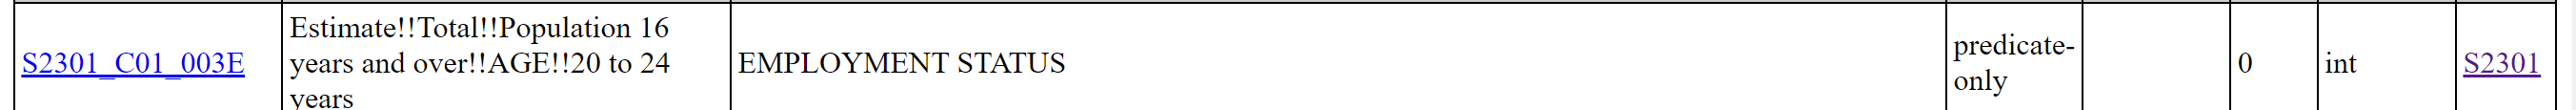
    
    
Pay attention to the suffixes on the actual variable name: **E** means estimate, **EA** means annotation of estimate, and **M** the means the associated margin of error to the estimate (usually given as a percentage.) 
    
So above, this estimate is the total number (count) of people aged 20 to 24 from a population of those 16 or older in the S2301 table. You can choose any geometry--tract,county,state,region--that exists in the table and has a projection!
    
Some geometries have more info than others; for example, most population records are complete, even for rural  or sparsely populated geometries (take for example, Luce County in the Upper Peninsula. There are not many folks there.) But, you may struggle to find labor variables on dentists in Luce County, as the Census Bureau just didn't have enough data to produce that statistic. Seems intuitive, but notably, they may try and produce a statistic on poor data; happens often. This is where the **MA** value comes in handy: if the **MA** is super large, we know it is a poor estimate, and may be best to treat it as we would null or missing data.
    
Here is how you get data from the API. I will do population:

In [2]:
import pandas as pd
from census import Census # may need to install this
from us import states

,NAME,B01003_001E,state_fips,county_fips,tract_code,GEOID
0,"Census Tract 1, Alcona County, Michigan",1644.0,26,001,000100,26001000100
1,"Census Tract 9701, Alcona County, Michigan",2448.0,26,001,970100,26001970100
2,"Census Tract 9704, Alcona County, Michigan",2773.0,26,001,970400,26001970400
3,"Census Tract 9705, Alcona County, Michigan",1923.0,26,001,970500,26001970500
4,"Census Tract 9706, Alcona County, Michigan",1350.0,26,001,970600,26001970600
...,...,...,...,...,...,...
3012,"Census Tract 3804, Wexford County, Michigan",4728.0,26,165,380400,26165380400
3013,"Census Tract 3805, Wexford County, Michigan",6890.0,26,165,380500,26165380500
3014,"Census Tract 3806, Wexford County, Michigan",3294.0,26,165,380600,26165380600
3015,"Census Tract 3807, Wexford County, Michigan",3209.0,26,165,380700,26165380700


In [63]:
c = Census('2cad02e99c0bde70c790f7391ffb3363c5e426ef')

fields = [
    'NAME',  # Geographic area name (e.g., the name of the state, county, or tract)
    
    # Commute-related fields (Table B08301 - Means of Transportation to Work)
    'B08301_001E',  # Total number of workers 16 years and over who commute to work
    'B08301_002E',  # Number of workers who drove alone to work
    'B08301_003E',  # Number of workers who carpooled to work
    'B08301_008E',  # Number of workers who used public transportation to get to work
    'B08301_011E',  # Number of workers who walked to work
    'B08301_012E',  # Number of workers who bicycled to work
    'B08301_013E',  # Number of workers who used a taxicab, motorcycle, or other means to get to work
    'B08301_014E',  # Number of workers who worked from home
    
    
    # Racial demaogrpahic fields
    'B02001_002E',  # White alone
    'B02001_003E',  # Black or African American alone
    'B02001_004E',  # American Indian and Alaska Native alone
    'B02001_005E',  # Asian alone
    'B02001_006E',  # Native Hawaiian and Other Pacific Islander alone
    'B02001_007E',  # Some other race alone
    'B02001_008E',   # Two or more races
    
    # Population-related fields
    'B01003_001E',  # Total population (Table B01003)
    
    # Income-related field (Table B19101 - Income in the Past 12 Months)
    'B19101_001E',  # Median household income
    
    # Poverty-related field (Table B17001 - Poverty Status in the Past 12 Months)
    'B17001_002E',  # Number of people below the poverty level
    
    # Age-related field (Table B01002 - Median Age by Sex)
    'B01002_001E',  # Median age of the population
    
    # Labor force fields by age group (Table B23001 - Employment Status by Age)
    'B23001_007E',  # Male, 16 to 19 years: In labor force
    'B23001_014E',  # Female, 16 to 19 years: In labor force
    'B23001_021E',  # Male, 20 to 24 years: In labor force
    'B23001_028E',  # Female, 20 to 24 years: In labor force
    'B23001_035E',  # Male, 25 to 29 years: In labor force
    'B23001_042E',  # Female, 25 to 29 years: In labor force
    'B23001_049E',  # Male, 30 to 34 years: In labor force
    'B23001_056E',  # Female, 30 to 34 years: In labor force
    'B23001_063E',  # Male, 35 to 39 years: In labor force
    'B23001_070E',  # Female, 35 to 39 years: In labor force
    'B23001_077E',  # Male, 40 to 44 years: In labor force
    'B23001_084E',  # Female, 40 to 44 years: In labor force
    'B23001_091E',  # Male, 45 to 49 years: In labor force
    'B23001_098E',  # Female, 45 to 49 years: In labor force
    'B23001_105E',  # Male, 50 to 54 years: In labor force
    'B23001_112E',  # Female, 50 to 54 years: In labor force
    
    # Housing-related fields (Table B25001, B25002, B25077, B25010)
    'B25001_001E',  # Total number of housing units
    'B25002_001E',  # Total number of housing units (occupied and unoccupied)
    'B25002_002E',  # Number of occupied housing units
    'B25077_001E',  # Median value of owner-occupied housing units
    'B25010_001E',  # Average household size
    'B25079_001E'   # Median Gross Rent
]

census_data = c.acs5.state_county_tract(
    fields=fields,
    county_fips="*",
    state_fips=states.MI.fips,
    tract="*",
    year=2021
)

df = pd.DataFrame(census_data)

df.rename(columns={
    'B08301_001E': 'Total Commuters',
    'B08301_002E': 'Driving Alone',
    'B08301_003E': 'Carpooling',
    'B08301_008E': 'Public Transportation',
    'B08301_011E': 'Walking',
    'B08301_012E': 'Cycling',
    'B08301_013E': 'Other Means',
    'B08301_014E': 'Worked from Home',
    'B01003_001E': 'Total Population',
    'B19101_001E': 'Median Income',
    'B17001_002E': 'Poverty Count',
    'B01002_001E': 'Median Age',
    'B25001_001E': 'Total Housing Units',
    'B25002_001E': 'Housing Units',
    'B25002_002E': 'Occupied Housing Units',
    'B25077_001E': 'Median Housing Value',
    'B25010_001E': 'Average Household Size',
    'B25079_001E': 'Median Gross Rent',
    'B02001_002E': 'White',
    'B02001_003E': 'Black or African American',
    'B02001_004E': 'American Indian and Alaska Native',
    'B02001_005E': 'Asian',
    'B02001_006E': 'Native Hawaiian and Other Pacific Islander',
    'B02001_007E': 'Some Other Race',
    'B02001_008E': 'Two or More Races'
}, inplace=True)

# Calculate Poverty Rate
df['Poverty Rate'] = (df['Poverty Count'] / df['Total Population']) * 100

# Calculate Labor Force counts
labor_force_columns = {
    'Labor Force 16-19': ['B23001_007E', 'B23001_014E'],
    'Labor Force 20-24': ['B23001_021E', 'B23001_028E'],
    'Labor Force 25-29': ['B23001_035E', 'B23001_042E'],
    'Labor Force 30-34': ['B23001_049E', 'B23001_056E'],
    'Labor Force 35-39': ['B23001_063E', 'B23001_070E'],
    'Labor Force 40-44': ['B23001_077E', 'B23001_084E'],
    'Labor Force 45-49': ['B23001_091E', 'B23001_098E'],
    'Labor Force 50-54': ['B23001_105E', 'B23001_112E']
}

for age_group, columns in labor_force_columns.items():
    df[age_group] = df[columns].astype(int).sum(axis=1)

# Calculate Housing Density (using total population as a proxy for land area)
df['Housing Density'] = df['Total Housing Units'] / (df['Total Population'] / 1000)  # Units per 1000 people

# Calculate Housing Availability
df['Housing Availability'] = (df['Housing Units'] - df['Occupied Housing Units']) / df['Housing Units'] * 100

# Convert relevant columns to numeric type
numeric_columns = ['Total Population', 'Total Housing Units', 'Housing Units', 'Occupied Housing Units', 
                   'Median Housing Value', 'Median Gross Rent', 'Median Age', 'Median Income']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop temporary columns
df = df.drop(columns=[col for col in df.columns if col.startswith('B23001_')])

# Remove duplicates if any
df = df.drop_duplicates()

# Reset index
df = df.reset_index(drop=True)

Let's see what we got... Anything that sticks out? Any stories?

In [64]:
df.to_csv('881data_census_withrace.csv')

# <font color = 'Purple'> Walk Score and Bike Score
    
Yeah, this is my first time using this so I'm gonna let AI drive the boat here.
    

If you're wondering.... no, the geometries for BikeScore and WalkScore aren't the same: *While Walk Score and Bike Score are valuable metrics for evaluating the walkability and bikeability of an area, they don't directly correspond to census tracts or other census geometries. Instead, they typically provide scores for specific addresses or coordinates.*
    
> But all is not lost yet...
    
    
*However, we can approximate Walk Score and Bike Score values for census tracts by using a representative point within each tract, such as its centroid. Here's how we can integrate this with our existing census data:* --Claude 3.5 Sonnet
    
Ambitious!

In [42]:
import requests

In [43]:
# WalkScore API key
walk_score_api_key = "ae097cfb1fc56c03e1706e973c62694c" ### your key here, please

# Function to get WalkScore and BikeScore using lat and lon
def get_walk_bike_score(lat, lon, address):
    url = "https://api.walkscore.com/score"
    params = {
        'format': 'json',
        'lat': lat,
        'lon': lon,
        'address': address,
        'transit': '1',
        'bike': '1',
        'wsapikey': walk_score_api_key,
    }

    # Make the request to WalkScore API
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            'walkscore': data.get('walkscore'),
            'bikescore': data.get('bike'),
            'transitscore': data.get('transit'),
            'description': data.get('description')
        }
    else:
        return {'error': response.status_code}

# Example usage with a centroid or key point of a tract
lat, lon = 42.3314, -83.0458  # Example lat/lon (Detroit)
address = "Detroit, MI"
scores = get_walk_bike_score(lat, lon, address)
print(scores)


{'walkscore': 99, 'bikescore': {'description': 'Bikeable', 'score': 64}, 'transitscore': {'description': 'Excellent Transit', 'summary': '47 nearby routes: 46 bus, 1 rail, 0 other', 'score': 85}, 'description': "Walker's Paradise"}


Looks like it is easy to overload the WalkScore API... let me know if anyone else comes up with somethin good!

In [44]:
# WalkScore API key
walk_score_api_key = "ae097cfb1fc56c03e1706e973c62694c" ### your key here, please

# Function to get WalkScore and BikeScore using lat and lon
def get_walk_bike_score(lat, lon, address):
    url = "https://api.walkscore.com/score"
    params = {
        'format': 'json',
        'lat': lat,
        'lon': lon,
        'transit': '1',
        'bike': '1',
        'address': address,
        'wsapikey': walk_score_api_key,
    }

    # Make the request to WalkScore API
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            'walkscore': data.get('walkscore'),
            'bikescore': data.get('bike'),
            'transitscore': data.get('transit'),
            'description': data.get('description')
        }
    else:
        return {'error': response.status_code}

# Example usage with a centroid or key point of a tract
lat, lon = 42.7370, -84.4839  # Example lat/lon (Detroit)
address = "East Lansing, MI"
scores = get_walk_bike_score(lat, lon, address)
print(scores)


{'walkscore': 89, 'bikescore': {'description': "Biker's Paradise", 'score': 100}, 'transitscore': None, 'description': 'Very Walkable'}


**Hooray! We know it works!** We're going to need the centroids of the tracts.

In [45]:
# Your Census API key
api_key = '2cad02e99c0bde70c790f7391ffb3363c5e426ef'

fields = [
    'NAME',  # Geographic area name (e.g., the name of the state, county, or tract)
    'B01003_001E',  # Doesn't matter what here
]

# Fetch the data
census_data = c.acs5.state_county_tract(
    fields=fields,
    county_fips="*",
    state_fips=states.MI.fips,
    tract="*",
    year=2021
)

# Convert to DataFrame and name it df2
df2 = pd.DataFrame(census_data)

# The state, county, and tract codes are automatically included in the response
# Rename them for clarity
df2 = df2.rename(columns={
    'state': 'state_fips',
    'county': 'county_fips',
    'tract': 'tract_code'
})

# If you need the GEOID, you can generate it
def generate_geoid(row):
    return f"{row['state_fips']}{row['county_fips']}{row['tract_code']}"

df2['GEOID'] = df2.apply(generate_geoid, axis=1)

# Display the first few rows
print(df2.head())

# Display column names
print("\nColumns in df2:")
print(df2.columns)


                                         NAME  B01003_001E state_fips  \
0     Census Tract 1, Alcona County, Michigan       1644.0         26   
1  Census Tract 9701, Alcona County, Michigan       2448.0         26   
2  Census Tract 9704, Alcona County, Michigan       2773.0         26   
3  Census Tract 9705, Alcona County, Michigan       1923.0         26   
4  Census Tract 9706, Alcona County, Michigan       1350.0         26   

  county_fips tract_code        GEOID  
0         001     000100  26001000100  
1         001     970100  26001970100  
2         001     970400  26001970400  
3         001     970500  26001970500  
4         001     970600  26001970600  

Columns in df2:
Index(['NAME', 'B01003_001E', 'state_fips', 'county_fips', 'tract_code',
       'GEOID'],
      dtype='object')


In [46]:
# Load the TIGER/Line shapefile for Census tracts (you already have this shapefile)
shapefile_path = 'tl_2023_26_tract.shp'  # Replace with the correct path
tracts_gdf = gpd.read_file(shapefile_path)

# Calculate the centroids of each tract
tracts_gdf['centroid'] = tracts_gdf.geometry.centroid

# Extract latitude and longitude of the centroids
tracts_gdf['lat'] = tracts_gdf.centroid.y
tracts_gdf['lon'] = tracts_gdf.centroid.x

# Select relevant columns (GEOID for tract and the coordinates)
tracts_centroids = tracts_gdf[['GEOID', 'lat', 'lon']]

# Merge the centroid data with df2 using the GEOID
df_with_centroids = df2.merge(tracts_centroids, on='GEOID', how='left')

df_with_centroids


C:\Users\mxgre\AppData\Local\Temp\ipykernel_5924\1960617390.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts_gdf['centroid'] = tracts_gdf.geometry.centroid
C:\Users\mxgre\AppData\Local\Temp\ipykernel_5924\1960617390.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts_gdf['lat'] = tracts_gdf.centroid.y
C:\Users\mxgre\AppData\Local\Temp\ipykernel_5924\1960617390.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts_gdf['lon'] = tracts_gdf.centroid.x


,NAME,B01003_001E,state_fips,county_fips,tract_code,GEOID,lat,lon
0,"Census Tract 1, Alcona County, Michigan",1644.0,26,001,000100,26001000100,44.809857,-83.499319
1,"Census Tract 9701, Alcona County, Michigan",2448.0,26,001,970100,26001970100,44.745811,-83.335981
2,"Census Tract 9704, Alcona County, Michigan",2773.0,26,001,970400,26001970400,44.628743,-83.486410
3,"Census Tract 9705, Alcona County, Michigan",1923.0,26,001,970500,26001970500,44.686459,-83.735223
4,"Census Tract 9706, Alcona County, Michigan",1350.0,26,001,970600,26001970600,44.551540,-83.365002
...,...,...,...,...,...,...,...,...
3012,"Census Tract 3804, Wexford County, Michigan",4728.0,26,165,380400,26165380400,44.253319,-85.516416
3013,"Census Tract 3805, Wexford County, Michigan",6890.0,26,165,380500,26165380500,44.239880,-85.393256
3014,"Census Tract 3806, Wexford County, Michigan",3294.0,26,165,380600,26165380600,44.256403,-85.388637
3015,"Census Tract 3807, Wexford County, Michigan",3209.0,26,165,380700,26165380700,44.256861,-85.417168


# Code to Get WalkScore and BikeScore for Each Tract:


In [55]:
import requests
import logging
import time
import pandas as pd
from datetime import datetime

# WalkScore API key
walk_score_api_key = "ae097cfb1fc56c03e1706e973c62694c"  # Your WalkScore API key here

# Set up basic logging to track progress
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to get WalkScore and BikeScore using lat and lon, with retries and timeout handling
def get_walk_bike_score(lat, lon, address, max_retries=3, timeout=10):
    url = "https://api.walkscore.com/score"
    params = {
        'format': 'json',
        'lat': lat,
        'lon': lon,
        'transit': '1',
        'bike': '1',
        'address': address,
        'wsapikey': walk_score_api_key,
    }
    
    retries = 0
    while retries < max_retries:
        try:
            # Make the request to WalkScore API with a timeout
            response = requests.get(url, params=params, timeout=timeout)
            if response.status_code == 200:
                data = response.json()
                return {
                    'walkscore': data.get('walkscore'),
                    'bikescore': data.get('bike'),
                    'transitscore': data.get('transit'),
                    'description': data.get('description'),
                    'status': 'success'
                }
            else:
                logging.error(f"Error {response.status_code} for {address}")
                return {'error': response.status_code, 'status': 'failed'}
        except requests.exceptions.Timeout:
            logging.warning(f"Timeout occurred for address: {address}, retrying... ({retries + 1}/{max_retries})")
            retries += 1
            time.sleep(2 ** retries)  # Exponential backoff
        except requests.exceptions.RequestException as e:
            logging.error(f"Request failed for address: {address}, error: {e}")
            return {'error': 'request_failed', 'status': 'failed'}
    
    # If retries are exhausted, return an error
    return {'error': 'max_retries_exceeded', 'status': 'failed'}

# Batch processing settings
batch_size = 200
total_tracts = len(census_tract_data_with_centroids)

# Split the census_tract_data_with_centroids into batches
batches = [census_tract_data_with_centroids.iloc[i:i + batch_size] for i in range(0, total_tracts, batch_size)]

# List to store DataFrames from each batch
batch_results = []

# Loop through each batch
for batch_num, batch in enumerate(batches):
    logging.info(f"Processing batch {batch_num + 1}/{len(batches)} ({len(batch)} tracts)")

    walk_scores = []
    success_count = 0
    fail_count = 0
    
    # Process each row in the batch
    for index, row in batch.iterrows():
        lat = row['lat']
        lon = row['lon']
        address = row['NAME']  # You can use the tract name or a custom address
        scores = get_walk_bike_score(lat, lon, address)
        walk_scores.append(scores)
        
        # Check if the request was successful or failed
        if scores['status'] == 'success':
            success_count += 1
        else:
            fail_count += 1
        
        # Log the progress after every request
        logging.info(f"Processed {index + 1}/{len(batch)} tracts in batch {batch_num + 1}. Successes: {success_count}, Failures: {fail_count}")
        
        # Optional: sleep between requests to avoid rate-limiting
        time.sleep(1)

    # Convert the results to a DataFrame and merge it back with the original batch data
    walk_scores_df = pd.DataFrame(walk_scores)
    batch_with_scores = pd.concat([batch.reset_index(drop=True), walk_scores_df], axis=1)

    # Store the batch result
    batch_results.append(batch_with_scores)
    
    # Save each batch as a CSV with a timestamp for backup
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    batch_filename = f"batch_{batch_num + 1}_walkscore_{timestamp}.csv"
    batch_with_scores.to_csv(batch_filename, index=False)
    logging.info(f"Batch {batch_num + 1} saved as {batch_filename}. Successes: {success_count}, Failures: {fail_count}")

# Combine all the batches into one final DataFrame
final_df = pd.concat(batch_results, axis=0)

# Save the final DataFrame with WalkScore and BikeScore data to a CSV file with a timestamp
final_filename = f"walkscore_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
final_df.to_csv(final_filename, index=False)

logging.info(f"All batches processed and saved as {final_filename}")


2024-09-26 15:22:37,190 - INFO - Processing batch 1/16 (200 tracts)
2024-09-26 15:22:38,473 - INFO - Processed 1/200 tracts in batch 1. Successes: 1, Failures: 0
2024-09-26 15:22:40,653 - INFO - Processed 2/200 tracts in batch 1. Successes: 2, Failures: 0
2024-09-26 15:22:42,855 - INFO - Processed 3/200 tracts in batch 1. Successes: 3, Failures: 0
2024-09-26 15:22:45,142 - INFO - Processed 4/200 tracts in batch 1. Successes: 4, Failures: 0
2024-09-26 15:22:47,338 - INFO - Processed 5/200 tracts in batch 1. Successes: 5, Failures: 0
2024-09-26 15:22:49,535 - INFO - Processed 6/200 tracts in batch 1. Successes: 6, Failures: 0
2024-09-26 15:22:51,734 - INFO - Processed 7/200 tracts in batch 1. Successes: 7, Failures: 0
2024-09-26 15:22:53,922 - INFO - Processed 8/200 tracts in batch 1. Successes: 8, Failures: 0
2024-09-26 15:22:56,222 - INFO - Processed 9/200 tracts in batch 1. Successes: 9, Failures: 0
2024-09-26 15:22:58,618 - INFO - Processed 10/200 tracts in batch 1. Successes: 10, Fa

2024-09-26 15:25:52,219 - INFO - Processed 86/200 tracts in batch 1. Successes: 86, Failures: 0
2024-09-26 15:25:54,632 - INFO - Processed 87/200 tracts in batch 1. Successes: 87, Failures: 0
2024-09-26 15:25:56,916 - INFO - Processed 88/200 tracts in batch 1. Successes: 88, Failures: 0
2024-09-26 15:25:59,429 - INFO - Processed 89/200 tracts in batch 1. Successes: 89, Failures: 0
2024-09-26 15:26:01,829 - INFO - Processed 90/200 tracts in batch 1. Successes: 90, Failures: 0
2024-09-26 15:26:04,024 - INFO - Processed 91/200 tracts in batch 1. Successes: 91, Failures: 0
2024-09-26 15:26:06,533 - INFO - Processed 92/200 tracts in batch 1. Successes: 92, Failures: 0
2024-09-26 15:26:08,714 - INFO - Processed 93/200 tracts in batch 1. Successes: 93, Failures: 0
2024-09-26 15:26:11,020 - INFO - Processed 94/200 tracts in batch 1. Successes: 94, Failures: 0
2024-09-26 15:26:13,311 - INFO - Processed 95/200 tracts in batch 1. Successes: 95, Failures: 0
2024-09-26 15:26:15,594 - INFO - Process

2024-09-26 15:29:01,485 - INFO - Processed 170/200 tracts in batch 1. Successes: 170, Failures: 0
2024-09-26 15:29:03,663 - INFO - Processed 171/200 tracts in batch 1. Successes: 171, Failures: 0
2024-09-26 15:29:05,978 - INFO - Processed 172/200 tracts in batch 1. Successes: 172, Failures: 0
2024-09-26 15:29:08,169 - INFO - Processed 173/200 tracts in batch 1. Successes: 173, Failures: 0
2024-09-26 15:29:10,559 - INFO - Processed 174/200 tracts in batch 1. Successes: 174, Failures: 0
2024-09-26 15:29:12,864 - INFO - Processed 175/200 tracts in batch 1. Successes: 175, Failures: 0
2024-09-26 15:29:15,063 - INFO - Processed 176/200 tracts in batch 1. Successes: 176, Failures: 0
2024-09-26 15:29:17,663 - INFO - Processed 177/200 tracts in batch 1. Successes: 177, Failures: 0
2024-09-26 15:29:20,074 - INFO - Processed 178/200 tracts in batch 1. Successes: 178, Failures: 0
2024-09-26 15:29:22,670 - INFO - Processed 179/200 tracts in batch 1. Successes: 179, Failures: 0
2024-09-26 15:29:25,

2024-09-26 15:32:15,449 - INFO - Processed 253/200 tracts in batch 2. Successes: 53, Failures: 0
2024-09-26 15:32:17,640 - INFO - Processed 254/200 tracts in batch 2. Successes: 54, Failures: 0
2024-09-26 15:32:19,934 - INFO - Processed 255/200 tracts in batch 2. Successes: 55, Failures: 0
2024-09-26 15:32:22,108 - INFO - Processed 256/200 tracts in batch 2. Successes: 56, Failures: 0
2024-09-26 15:32:24,685 - INFO - Processed 257/200 tracts in batch 2. Successes: 57, Failures: 0
2024-09-26 15:32:26,832 - INFO - Processed 258/200 tracts in batch 2. Successes: 58, Failures: 0
2024-09-26 15:34:25,842 - INFO - Processed 259/200 tracts in batch 2. Successes: 59, Failures: 0
2024-09-26 15:34:28,116 - INFO - Processed 260/200 tracts in batch 2. Successes: 60, Failures: 0
2024-09-26 15:34:30,695 - INFO - Processed 261/200 tracts in batch 2. Successes: 61, Failures: 0
2024-09-26 15:34:33,119 - INFO - Processed 262/200 tracts in batch 2. Successes: 62, Failures: 0
2024-09-26 15:34:35,298 - INFO

2024-09-26 15:37:27,115 - INFO - Processed 338/200 tracts in batch 2. Successes: 138, Failures: 0
2024-09-26 15:37:29,316 - INFO - Processed 339/200 tracts in batch 2. Successes: 139, Failures: 0
2024-09-26 15:37:31,482 - INFO - Processed 340/200 tracts in batch 2. Successes: 140, Failures: 0
2024-09-26 15:37:33,809 - INFO - Processed 341/200 tracts in batch 2. Successes: 141, Failures: 0
2024-09-26 15:37:35,990 - INFO - Processed 342/200 tracts in batch 2. Successes: 142, Failures: 0
2024-09-26 15:37:38,508 - INFO - Processed 343/200 tracts in batch 2. Successes: 143, Failures: 0
2024-09-26 15:37:40,707 - INFO - Processed 344/200 tracts in batch 2. Successes: 144, Failures: 0
2024-09-26 15:37:43,107 - INFO - Processed 345/200 tracts in batch 2. Successes: 145, Failures: 0
2024-09-26 15:37:45,405 - INFO - Processed 346/200 tracts in batch 2. Successes: 146, Failures: 0
2024-09-26 15:37:47,583 - INFO - Processed 347/200 tracts in batch 2. Successes: 147, Failures: 0
2024-09-26 15:37:49,

2024-09-26 15:40:53,414 - INFO - Processed 419/200 tracts in batch 3. Successes: 19, Failures: 0
2024-09-26 15:40:56,023 - INFO - Processed 420/200 tracts in batch 3. Successes: 20, Failures: 0
2024-09-26 15:40:58,360 - INFO - Processed 421/200 tracts in batch 3. Successes: 21, Failures: 0
2024-09-26 15:41:00,828 - INFO - Processed 422/200 tracts in batch 3. Successes: 22, Failures: 0
2024-09-26 15:41:03,127 - INFO - Processed 423/200 tracts in batch 3. Successes: 23, Failures: 0
2024-09-26 15:41:05,631 - INFO - Processed 424/200 tracts in batch 3. Successes: 24, Failures: 0
2024-09-26 15:41:08,033 - INFO - Processed 425/200 tracts in batch 3. Successes: 25, Failures: 0
2024-09-26 15:41:10,329 - INFO - Processed 426/200 tracts in batch 3. Successes: 26, Failures: 0
2024-09-26 15:41:12,756 - INFO - Processed 427/200 tracts in batch 3. Successes: 27, Failures: 0
2024-09-26 15:41:15,003 - INFO - Processed 428/200 tracts in batch 3. Successes: 28, Failures: 0
2024-09-26 15:41:17,315 - INFO

2024-09-26 15:44:07,266 - INFO - Processed 504/200 tracts in batch 3. Successes: 104, Failures: 0
2024-09-26 15:44:09,561 - INFO - Processed 505/200 tracts in batch 3. Successes: 105, Failures: 0
2024-09-26 15:44:11,870 - INFO - Processed 506/200 tracts in batch 3. Successes: 106, Failures: 0
2024-09-26 15:44:14,152 - INFO - Processed 507/200 tracts in batch 3. Successes: 107, Failures: 0
2024-09-26 15:44:16,662 - INFO - Processed 508/200 tracts in batch 3. Successes: 108, Failures: 0
2024-09-26 15:44:18,859 - INFO - Processed 509/200 tracts in batch 3. Successes: 109, Failures: 0
2024-09-26 15:44:21,055 - INFO - Processed 510/200 tracts in batch 3. Successes: 110, Failures: 0
2024-09-26 15:44:23,769 - INFO - Processed 511/200 tracts in batch 3. Successes: 111, Failures: 0
2024-09-26 15:44:25,966 - INFO - Processed 512/200 tracts in batch 3. Successes: 112, Failures: 0
2024-09-26 15:44:28,263 - INFO - Processed 513/200 tracts in batch 3. Successes: 113, Failures: 0
2024-09-26 15:44:30,

2024-09-26 15:47:21,849 - INFO - Processed 588/200 tracts in batch 3. Successes: 188, Failures: 0
2024-09-26 15:47:24,567 - INFO - Processed 589/200 tracts in batch 3. Successes: 189, Failures: 0
2024-09-26 15:47:26,769 - INFO - Processed 590/200 tracts in batch 3. Successes: 190, Failures: 0
2024-09-26 15:47:29,051 - INFO - Processed 591/200 tracts in batch 3. Successes: 191, Failures: 0
2024-09-26 15:47:31,427 - INFO - Processed 592/200 tracts in batch 3. Successes: 192, Failures: 0
2024-09-26 15:47:33,755 - INFO - Processed 593/200 tracts in batch 3. Successes: 193, Failures: 0
2024-09-26 15:47:36,273 - INFO - Processed 594/200 tracts in batch 3. Successes: 194, Failures: 0
2024-09-26 15:47:38,885 - INFO - Processed 595/200 tracts in batch 3. Successes: 195, Failures: 0
2024-09-26 15:47:41,394 - INFO - Processed 596/200 tracts in batch 3. Successes: 196, Failures: 0
2024-09-26 15:47:43,676 - INFO - Processed 597/200 tracts in batch 3. Successes: 197, Failures: 0
2024-09-26 15:47:45,

2024-09-26 15:50:45,424 - INFO - Processed 671/200 tracts in batch 4. Successes: 71, Failures: 0
2024-09-26 15:50:47,830 - INFO - Processed 672/200 tracts in batch 4. Successes: 72, Failures: 0
2024-09-26 15:50:50,028 - INFO - Processed 673/200 tracts in batch 4. Successes: 73, Failures: 0
2024-09-26 15:50:52,417 - INFO - Processed 674/200 tracts in batch 4. Successes: 74, Failures: 0
2024-09-26 15:50:55,145 - INFO - Processed 675/200 tracts in batch 4. Successes: 75, Failures: 0
2024-09-26 15:50:57,862 - INFO - Processed 676/200 tracts in batch 4. Successes: 76, Failures: 0
2024-09-26 15:51:00,265 - INFO - Processed 677/200 tracts in batch 4. Successes: 77, Failures: 0
2024-09-26 15:51:02,558 - INFO - Processed 678/200 tracts in batch 4. Successes: 78, Failures: 0
2024-09-26 15:51:04,854 - INFO - Processed 679/200 tracts in batch 4. Successes: 79, Failures: 0
2024-09-26 15:51:07,358 - INFO - Processed 680/200 tracts in batch 4. Successes: 80, Failures: 0
2024-09-26 15:51:09,653 - INFO

2024-09-26 15:55:12,085 - INFO - Processed 754/200 tracts in batch 4. Successes: 154, Failures: 0
2024-09-26 15:55:14,281 - INFO - Processed 755/200 tracts in batch 4. Successes: 155, Failures: 0
2024-09-26 15:55:16,884 - INFO - Processed 756/200 tracts in batch 4. Successes: 156, Failures: 0
2024-09-26 15:55:19,389 - INFO - Processed 757/200 tracts in batch 4. Successes: 157, Failures: 0
2024-09-26 15:55:21,910 - INFO - Processed 758/200 tracts in batch 4. Successes: 158, Failures: 0
2024-09-26 15:55:24,627 - INFO - Processed 759/200 tracts in batch 4. Successes: 159, Failures: 0
2024-09-26 15:55:27,337 - INFO - Processed 760/200 tracts in batch 4. Successes: 160, Failures: 0
2024-09-26 15:55:29,743 - INFO - Processed 761/200 tracts in batch 4. Successes: 161, Failures: 0
2024-09-26 15:55:32,453 - INFO - Processed 762/200 tracts in batch 4. Successes: 162, Failures: 0
2024-09-26 15:55:34,932 - INFO - Processed 763/200 tracts in batch 4. Successes: 163, Failures: 0
2024-09-26 15:55:37,

2024-09-26 15:58:37,500 - INFO - Processed 835/200 tracts in batch 5. Successes: 35, Failures: 0
2024-09-26 15:58:39,567 - INFO - Processed 836/200 tracts in batch 5. Successes: 36, Failures: 0
2024-09-26 15:58:41,660 - INFO - Processed 837/200 tracts in batch 5. Successes: 37, Failures: 0
2024-09-26 15:58:43,916 - INFO - Processed 838/200 tracts in batch 5. Successes: 38, Failures: 0
2024-09-26 15:58:46,113 - INFO - Processed 839/200 tracts in batch 5. Successes: 39, Failures: 0
2024-09-26 15:58:48,249 - INFO - Processed 840/200 tracts in batch 5. Successes: 40, Failures: 0
2024-09-26 15:58:50,751 - INFO - Processed 841/200 tracts in batch 5. Successes: 41, Failures: 0
2024-09-26 15:58:52,948 - INFO - Processed 842/200 tracts in batch 5. Successes: 42, Failures: 0
2024-09-26 15:58:55,510 - INFO - Processed 843/200 tracts in batch 5. Successes: 43, Failures: 0
2024-09-26 15:58:57,797 - INFO - Processed 844/200 tracts in batch 5. Successes: 44, Failures: 0
2024-09-26 15:59:01,357 - INFO

2024-09-26 16:02:19,917 - INFO - Processed 920/200 tracts in batch 5. Successes: 120, Failures: 0
2024-09-26 16:02:22,203 - INFO - Processed 921/200 tracts in batch 5. Successes: 121, Failures: 0
2024-09-26 16:02:24,498 - INFO - Processed 922/200 tracts in batch 5. Successes: 122, Failures: 0
2024-09-26 16:02:26,910 - INFO - Processed 923/200 tracts in batch 5. Successes: 123, Failures: 0
2024-09-26 16:02:29,616 - INFO - Processed 924/200 tracts in batch 5. Successes: 124, Failures: 0
2024-09-26 16:02:32,347 - INFO - Processed 925/200 tracts in batch 5. Successes: 125, Failures: 0
2024-09-26 16:02:34,632 - INFO - Processed 926/200 tracts in batch 5. Successes: 126, Failures: 0
2024-09-26 16:02:36,834 - INFO - Processed 927/200 tracts in batch 5. Successes: 127, Failures: 0
2024-09-26 16:02:39,137 - INFO - Processed 928/200 tracts in batch 5. Successes: 128, Failures: 0
2024-09-26 16:02:41,522 - INFO - Processed 929/200 tracts in batch 5. Successes: 129, Failures: 0
2024-09-26 16:02:43,

2024-09-26 16:05:37,430 - INFO - Processed 1002/200 tracts in batch 6. Successes: 2, Failures: 0
2024-09-26 16:05:40,035 - INFO - Processed 1003/200 tracts in batch 6. Successes: 3, Failures: 0
2024-09-26 16:05:42,332 - INFO - Processed 1004/200 tracts in batch 6. Successes: 4, Failures: 0
2024-09-26 16:05:44,845 - INFO - Processed 1005/200 tracts in batch 6. Successes: 5, Failures: 0
2024-09-26 16:05:47,036 - INFO - Processed 1006/200 tracts in batch 6. Successes: 6, Failures: 0
2024-09-26 16:05:49,663 - INFO - Processed 1007/200 tracts in batch 6. Successes: 7, Failures: 0
2024-09-26 16:05:52,052 - INFO - Processed 1008/200 tracts in batch 6. Successes: 8, Failures: 0
2024-09-26 16:05:54,564 - INFO - Processed 1009/200 tracts in batch 6. Successes: 9, Failures: 0
2024-09-26 16:05:56,967 - INFO - Processed 1010/200 tracts in batch 6. Successes: 10, Failures: 0
2024-09-26 16:05:59,262 - INFO - Processed 1011/200 tracts in batch 6. Successes: 11, Failures: 0
2024-09-26 16:06:01,660 - IN

2024-09-26 16:09:00,522 - INFO - Processed 1084/200 tracts in batch 6. Successes: 83, Failures: 1
2024-09-26 16:09:02,949 - INFO - Processed 1085/200 tracts in batch 6. Successes: 84, Failures: 1
2024-09-26 16:09:05,208 - INFO - Processed 1086/200 tracts in batch 6. Successes: 85, Failures: 1
2024-09-26 16:09:07,576 - INFO - Processed 1087/200 tracts in batch 6. Successes: 86, Failures: 1
2024-09-26 16:09:09,933 - INFO - Processed 1088/200 tracts in batch 6. Successes: 87, Failures: 1
2024-09-26 16:09:12,279 - INFO - Processed 1089/200 tracts in batch 6. Successes: 88, Failures: 1
2024-09-26 16:09:14,884 - INFO - Processed 1090/200 tracts in batch 6. Successes: 89, Failures: 1
2024-09-26 16:09:17,178 - INFO - Processed 1091/200 tracts in batch 6. Successes: 90, Failures: 1
2024-09-26 16:09:19,428 - INFO - Processed 1092/200 tracts in batch 6. Successes: 91, Failures: 1
2024-09-26 16:09:21,680 - INFO - Processed 1093/200 tracts in batch 6. Successes: 92, Failures: 1
2024-09-26 16:09:23,

2024-09-26 16:12:18,309 - INFO - Processed 1167/200 tracts in batch 6. Successes: 166, Failures: 1
2024-09-26 16:12:20,910 - INFO - Processed 1168/200 tracts in batch 6. Successes: 167, Failures: 1
2024-09-26 16:12:23,527 - INFO - Processed 1169/200 tracts in batch 6. Successes: 168, Failures: 1
2024-09-26 16:12:25,824 - INFO - Processed 1170/200 tracts in batch 6. Successes: 169, Failures: 1
2024-09-26 16:12:28,239 - INFO - Processed 1171/200 tracts in batch 6. Successes: 170, Failures: 1
2024-09-26 16:12:30,736 - INFO - Processed 1172/200 tracts in batch 6. Successes: 171, Failures: 1
2024-09-26 16:12:41,749 - WARNING - Timeout occurred for address: Census Tract 2225, Macomb County, Michigan, retrying... (1/3)
2024-09-26 16:12:45,245 - INFO - Processed 1173/200 tracts in batch 6. Successes: 172, Failures: 1
2024-09-26 16:12:47,549 - INFO - Processed 1174/200 tracts in batch 6. Successes: 173, Failures: 1
2024-09-26 16:12:50,157 - INFO - Processed 1175/200 tracts in batch 6. Successes

2024-09-26 16:15:43,649 - INFO - Processed 1248/200 tracts in batch 7. Successes: 48, Failures: 0
2024-09-26 16:15:45,947 - INFO - Processed 1249/200 tracts in batch 7. Successes: 49, Failures: 0
2024-09-26 16:15:48,340 - INFO - Processed 1250/200 tracts in batch 7. Successes: 50, Failures: 0
2024-09-26 16:15:50,859 - INFO - Processed 1251/200 tracts in batch 7. Successes: 51, Failures: 0
2024-09-26 16:15:53,366 - INFO - Processed 1252/200 tracts in batch 7. Successes: 52, Failures: 0
2024-09-26 16:15:55,664 - INFO - Processed 1253/200 tracts in batch 7. Successes: 53, Failures: 0
2024-09-26 16:15:58,169 - INFO - Processed 1254/200 tracts in batch 7. Successes: 54, Failures: 0
2024-09-26 16:16:00,470 - INFO - Processed 1255/200 tracts in batch 7. Successes: 55, Failures: 0
2024-09-26 16:16:02,976 - INFO - Processed 1256/200 tracts in batch 7. Successes: 56, Failures: 0
2024-09-26 16:16:05,265 - INFO - Processed 1257/200 tracts in batch 7. Successes: 57, Failures: 0
2024-09-26 16:16:07,

2024-09-26 16:19:00,648 - INFO - Processed 1332/200 tracts in batch 7. Successes: 132, Failures: 0
2024-09-26 16:19:02,826 - INFO - Processed 1333/200 tracts in batch 7. Successes: 133, Failures: 0
2024-09-26 16:19:05,344 - INFO - Processed 1334/200 tracts in batch 7. Successes: 134, Failures: 0
2024-09-26 16:19:07,634 - INFO - Processed 1335/200 tracts in batch 7. Successes: 135, Failures: 0
2024-09-26 16:19:09,828 - INFO - Processed 1336/200 tracts in batch 7. Successes: 136, Failures: 0
2024-09-26 16:19:12,133 - INFO - Processed 1337/200 tracts in batch 7. Successes: 137, Failures: 0
2024-09-26 16:19:14,539 - INFO - Processed 1338/200 tracts in batch 7. Successes: 138, Failures: 0
2024-09-26 16:19:17,254 - INFO - Processed 1339/200 tracts in batch 7. Successes: 139, Failures: 0
2024-09-26 16:19:19,445 - INFO - Processed 1340/200 tracts in batch 7. Successes: 140, Failures: 0
2024-09-26 16:19:21,735 - INFO - Processed 1341/200 tracts in batch 7. Successes: 141, Failures: 0
2024-09-26

2024-09-26 16:22:17,518 - INFO - Processed 1414/200 tracts in batch 8. Successes: 14, Failures: 0
2024-09-26 16:22:19,940 - INFO - Processed 1415/200 tracts in batch 8. Successes: 15, Failures: 0
2024-09-26 16:22:22,750 - INFO - Processed 1416/200 tracts in batch 8. Successes: 16, Failures: 0
2024-09-26 16:22:25,376 - INFO - Processed 1417/200 tracts in batch 8. Successes: 17, Failures: 0
2024-09-26 16:22:27,556 - INFO - Processed 1418/200 tracts in batch 8. Successes: 18, Failures: 0
2024-09-26 16:22:29,847 - INFO - Processed 1419/200 tracts in batch 8. Successes: 19, Failures: 0
2024-09-26 16:22:32,159 - INFO - Processed 1420/200 tracts in batch 8. Successes: 20, Failures: 0
2024-09-26 16:22:34,656 - INFO - Processed 1421/200 tracts in batch 8. Successes: 21, Failures: 0
2024-09-26 16:22:37,066 - INFO - Processed 1422/200 tracts in batch 8. Successes: 22, Failures: 0
2024-09-26 16:22:39,356 - INFO - Processed 1423/200 tracts in batch 8. Successes: 23, Failures: 0
2024-09-26 16:22:41,

2024-09-26 16:25:43,289 - INFO - Processed 1498/200 tracts in batch 8. Successes: 98, Failures: 0
2024-09-26 16:25:45,910 - INFO - Processed 1499/200 tracts in batch 8. Successes: 99, Failures: 0
2024-09-26 16:25:51,341 - INFO - Processed 1500/200 tracts in batch 8. Successes: 100, Failures: 0
2024-09-26 16:25:53,955 - INFO - Processed 1501/200 tracts in batch 8. Successes: 101, Failures: 0
2024-09-26 16:25:56,354 - INFO - Processed 1502/200 tracts in batch 8. Successes: 102, Failures: 0
2024-09-26 16:25:58,860 - INFO - Processed 1503/200 tracts in batch 8. Successes: 103, Failures: 0
2024-09-26 16:26:01,366 - INFO - Processed 1504/200 tracts in batch 8. Successes: 104, Failures: 0
2024-09-26 16:26:03,662 - INFO - Processed 1505/200 tracts in batch 8. Successes: 105, Failures: 0
2024-09-26 16:26:05,861 - INFO - Processed 1506/200 tracts in batch 8. Successes: 106, Failures: 0
2024-09-26 16:26:08,359 - INFO - Processed 1507/200 tracts in batch 8. Successes: 107, Failures: 0
2024-09-26 1

2024-09-26 16:29:07,198 - INFO - Processed 1581/200 tracts in batch 8. Successes: 181, Failures: 0
2024-09-26 16:29:09,492 - INFO - Processed 1582/200 tracts in batch 8. Successes: 182, Failures: 0
2024-09-26 16:29:11,898 - INFO - Processed 1583/200 tracts in batch 8. Successes: 183, Failures: 0
2024-09-26 16:29:14,197 - INFO - Processed 1584/200 tracts in batch 8. Successes: 184, Failures: 0
2024-09-26 16:29:16,706 - INFO - Processed 1585/200 tracts in batch 8. Successes: 185, Failures: 0
2024-09-26 16:29:19,109 - INFO - Processed 1586/200 tracts in batch 8. Successes: 186, Failures: 0
2024-09-26 16:29:21,391 - INFO - Processed 1587/200 tracts in batch 8. Successes: 187, Failures: 0
2024-09-26 16:29:23,600 - INFO - Processed 1588/200 tracts in batch 8. Successes: 188, Failures: 0
2024-09-26 16:29:25,891 - INFO - Processed 1589/200 tracts in batch 8. Successes: 189, Failures: 0
2024-09-26 16:29:28,609 - INFO - Processed 1590/200 tracts in batch 8. Successes: 190, Failures: 0
2024-09-26

2024-09-26 17:11:32,929 - INFO - Processed 1613/200 tracts in batch 9. Successes: 3, Failures: 10
2024-09-26 17:11:33,941 - ERROR - Request failed for address: Census Tract 1240, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.83115663608552&lon=-83.62934907410025&transit=1&bike=1&address=Census+Tract+1240%2C+Oakland+County%2C+Michigan&wsapikey=ae097cfb1fc56c03e1706e973c62694c (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000226945C3A90>: Failed to resolve 'api.walkscore.com' ([Errno 11001] getaddrinfo failed)"))
2024-09-26 17:11:33,941 - INFO - Processed 1614/200 tracts in batch 9. Successes: 3, Failures: 11
2024-09-26 17:11:34,972 - ERROR - Request failed for address: Census Tract 1245, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.79872076489242&lon=-

2024-09-26 17:12:13,408 - ERROR - Request failed for address: Census Tract 1274, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.7106908588934&lon=-83.38675159234376&transit=1&bike=1&address=Census+Tract+1274%2C+Oakland+County%2C+Michigan&wsapikey=ae097cfb1fc56c03e1706e973c62694c (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000226945B4350>: Failed to resolve 'api.walkscore.com' ([Errno 11001] getaddrinfo failed)"))
2024-09-26 17:12:13,408 - INFO - Processed 1626/200 tracts in batch 9. Successes: 3, Failures: 23
2024-09-26 17:12:14,418 - ERROR - Request failed for address: Census Tract 1275, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.731325506357926&lon=-83.4005077425817&transit=1&bike=1&address=Census+Tract+1275%2C+Oakland+County%2C+Michigan&wsapikey

2024-09-26 17:12:25,553 - INFO - Processed 1638/200 tracts in batch 9. Successes: 3, Failures: 35
2024-09-26 17:12:26,568 - ERROR - Request failed for address: Census Tract 1289, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.73816344877565&lon=-83.229725007975&transit=1&bike=1&address=Census+Tract+1289%2C+Oakland+County%2C+Michigan&wsapikey=ae097cfb1fc56c03e1706e973c62694c (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000226945C9E10>: Failed to resolve 'api.walkscore.com' ([Errno 11001] getaddrinfo failed)"))
2024-09-26 17:12:26,573 - INFO - Processed 1639/200 tracts in batch 9. Successes: 3, Failures: 36
2024-09-26 17:12:27,582 - ERROR - Request failed for address: Census Tract 1290, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.782726743306895&lon=-8

2024-09-26 17:12:38,747 - INFO - Processed 1651/200 tracts in batch 9. Successes: 3, Failures: 48
2024-09-26 17:12:39,752 - ERROR - Request failed for address: Census Tract 1315, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.679628001067&lon=-83.5900198184781&transit=1&bike=1&address=Census+Tract+1315%2C+Oakland+County%2C+Michigan&wsapikey=ae097cfb1fc56c03e1706e973c62694c (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022694589450>: Failed to resolve 'api.walkscore.com' ([Errno 11001] getaddrinfo failed)"))
2024-09-26 17:12:39,752 - INFO - Processed 1652/200 tracts in batch 9. Successes: 3, Failures: 49
2024-09-26 17:12:40,766 - ERROR - Request failed for address: Census Tract 1316, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.682035598323075&lon=-83

2024-09-26 17:12:51,914 - INFO - Processed 1664/200 tracts in batch 9. Successes: 3, Failures: 61
2024-09-26 17:12:52,920 - ERROR - Request failed for address: Census Tract 1343, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.577802671617505&lon=-83.49203134487533&transit=1&bike=1&address=Census+Tract+1343%2C+Oakland+County%2C+Michigan&wsapikey=ae097cfb1fc56c03e1706e973c62694c (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000226945290D0>: Failed to resolve 'api.walkscore.com' ([Errno 11001] getaddrinfo failed)"))
2024-09-26 17:12:52,920 - INFO - Processed 1665/200 tracts in batch 9. Successes: 3, Failures: 62
2024-09-26 17:12:53,938 - ERROR - Request failed for address: Census Tract 1344, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.58536895955308&lon=

2024-09-26 17:13:05,086 - INFO - Processed 1677/200 tracts in batch 9. Successes: 3, Failures: 74
2024-09-26 17:13:06,100 - ERROR - Request failed for address: Census Tract 1361.02, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.51915308224436&lon=-83.50591449604345&transit=1&bike=1&address=Census+Tract+1361.02%2C+Oakland+County%2C+Michigan&wsapikey=ae097cfb1fc56c03e1706e973c62694c (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022694596690>: Failed to resolve 'api.walkscore.com' ([Errno 11001] getaddrinfo failed)"))
2024-09-26 17:13:06,100 - INFO - Processed 1678/200 tracts in batch 9. Successes: 3, Failures: 75
2024-09-26 17:13:07,112 - ERROR - Request failed for address: Census Tract 1363, Oakland County, Michigan, error: HTTPSConnectionPool(host='api.walkscore.com', port=443): Max retries exceeded with url: /score?format=json&lat=42.45938485137996

2024-09-26 17:17:33,315 - INFO - Processed 1738/200 tracts in batch 9. Successes: 60, Failures: 78
2024-09-26 17:17:36,067 - INFO - Processed 1739/200 tracts in batch 9. Successes: 61, Failures: 78
2024-09-26 17:17:38,882 - INFO - Processed 1740/200 tracts in batch 9. Successes: 62, Failures: 78
2024-09-26 17:17:41,752 - INFO - Processed 1741/200 tracts in batch 9. Successes: 63, Failures: 78
2024-09-26 17:17:44,363 - INFO - Processed 1742/200 tracts in batch 9. Successes: 64, Failures: 78
2024-09-26 17:17:47,107 - INFO - Processed 1743/200 tracts in batch 9. Successes: 65, Failures: 78
2024-09-26 17:17:50,007 - INFO - Processed 1744/200 tracts in batch 9. Successes: 66, Failures: 78
2024-09-26 17:17:52,427 - INFO - Processed 1745/200 tracts in batch 9. Successes: 67, Failures: 78
2024-09-26 17:17:54,812 - INFO - Processed 1746/200 tracts in batch 9. Successes: 68, Failures: 78
2024-09-26 17:17:57,380 - INFO - Processed 1747/200 tracts in batch 9. Successes: 69, Failures: 78
2024-09-26

2024-09-26 17:21:06,001 - INFO - Processed 1819/200 tracts in batch 10. Successes: 19, Failures: 0
2024-09-26 17:21:08,458 - INFO - Processed 1820/200 tracts in batch 10. Successes: 20, Failures: 0
2024-09-26 17:21:10,810 - INFO - Processed 1821/200 tracts in batch 10. Successes: 21, Failures: 0
2024-09-26 17:21:13,282 - INFO - Processed 1822/200 tracts in batch 10. Successes: 22, Failures: 0
2024-09-26 17:21:15,635 - INFO - Processed 1823/200 tracts in batch 10. Successes: 23, Failures: 0
2024-09-26 17:21:18,493 - INFO - Processed 1824/200 tracts in batch 10. Successes: 24, Failures: 0
2024-09-26 17:21:21,053 - INFO - Processed 1825/200 tracts in batch 10. Successes: 25, Failures: 0
2024-09-26 17:21:23,443 - INFO - Processed 1826/200 tracts in batch 10. Successes: 26, Failures: 0
2024-09-26 17:21:25,972 - INFO - Processed 1827/200 tracts in batch 10. Successes: 27, Failures: 0
2024-09-26 17:21:28,330 - INFO - Processed 1828/200 tracts in batch 10. Successes: 28, Failures: 0
2024-09-26

2024-09-26 17:24:32,961 - INFO - Processed 1902/200 tracts in batch 10. Successes: 102, Failures: 0
2024-09-26 17:24:35,409 - INFO - Processed 1903/200 tracts in batch 10. Successes: 103, Failures: 0
2024-09-26 17:24:38,192 - INFO - Processed 1904/200 tracts in batch 10. Successes: 104, Failures: 0
2024-09-26 17:24:40,645 - INFO - Processed 1905/200 tracts in batch 10. Successes: 105, Failures: 0
2024-09-26 17:24:43,098 - INFO - Processed 1906/200 tracts in batch 10. Successes: 106, Failures: 0
2024-09-26 17:24:45,666 - INFO - Processed 1907/200 tracts in batch 10. Successes: 107, Failures: 0
2024-09-26 17:24:48,017 - INFO - Processed 1908/200 tracts in batch 10. Successes: 108, Failures: 0
2024-09-26 17:24:50,476 - INFO - Processed 1909/200 tracts in batch 10. Successes: 109, Failures: 0
2024-09-26 17:24:53,131 - INFO - Processed 1910/200 tracts in batch 10. Successes: 110, Failures: 0
2024-09-26 17:24:55,495 - INFO - Processed 1911/200 tracts in batch 10. Successes: 111, Failures: 0


2024-09-26 17:28:05,021 - INFO - Processed 1984/200 tracts in batch 10. Successes: 184, Failures: 0
2024-09-26 17:28:07,407 - INFO - Processed 1985/200 tracts in batch 10. Successes: 185, Failures: 0
2024-09-26 17:28:10,162 - INFO - Processed 1986/200 tracts in batch 10. Successes: 186, Failures: 0
2024-09-26 17:28:12,774 - INFO - Processed 1987/200 tracts in batch 10. Successes: 187, Failures: 0
2024-09-26 17:28:15,293 - INFO - Processed 1988/200 tracts in batch 10. Successes: 188, Failures: 0
2024-09-26 17:28:17,746 - INFO - Processed 1989/200 tracts in batch 10. Successes: 189, Failures: 0
2024-09-26 17:28:20,407 - INFO - Processed 1990/200 tracts in batch 10. Successes: 190, Failures: 0
2024-09-26 17:28:22,867 - INFO - Processed 1991/200 tracts in batch 10. Successes: 191, Failures: 0
2024-09-26 17:28:25,319 - INFO - Processed 1992/200 tracts in batch 10. Successes: 192, Failures: 0
2024-09-26 17:28:27,674 - INFO - Processed 1993/200 tracts in batch 10. Successes: 193, Failures: 0


2024-09-26 17:32:06,416 - INFO - Processed 2061/200 tracts in batch 11. Successes: 60, Failures: 1
2024-09-26 17:32:08,971 - INFO - Processed 2062/200 tracts in batch 11. Successes: 61, Failures: 1
2024-09-26 17:32:11,428 - INFO - Processed 2063/200 tracts in batch 11. Successes: 62, Failures: 1
2024-09-26 17:32:13,793 - INFO - Processed 2064/200 tracts in batch 11. Successes: 63, Failures: 1
2024-09-26 17:32:16,957 - INFO - Processed 2065/200 tracts in batch 11. Successes: 64, Failures: 1
2024-09-26 17:32:19,823 - INFO - Processed 2066/200 tracts in batch 11. Successes: 65, Failures: 1
2024-09-26 17:32:22,279 - INFO - Processed 2067/200 tracts in batch 11. Successes: 66, Failures: 1
2024-09-26 17:32:25,153 - INFO - Processed 2068/200 tracts in batch 11. Successes: 67, Failures: 1
2024-09-26 17:32:28,633 - INFO - Processed 2069/200 tracts in batch 11. Successes: 68, Failures: 1
2024-09-26 17:32:30,984 - INFO - Processed 2070/200 tracts in batch 11. Successes: 69, Failures: 1
2024-09-26

2024-09-26 17:35:32,442 - INFO - Processed 2144/200 tracts in batch 11. Successes: 143, Failures: 1
2024-09-26 17:35:34,175 - INFO - Processed 2145/200 tracts in batch 11. Successes: 144, Failures: 1
2024-09-26 17:35:36,013 - INFO - Processed 2146/200 tracts in batch 11. Successes: 145, Failures: 1
2024-09-26 17:35:37,797 - INFO - Processed 2147/200 tracts in batch 11. Successes: 146, Failures: 1
2024-09-26 17:35:39,742 - INFO - Processed 2148/200 tracts in batch 11. Successes: 147, Failures: 1
2024-09-26 17:35:41,894 - INFO - Processed 2149/200 tracts in batch 11. Successes: 148, Failures: 1
2024-09-26 17:35:48,013 - INFO - Processed 2150/200 tracts in batch 11. Successes: 149, Failures: 1
2024-09-26 17:35:49,999 - INFO - Processed 2151/200 tracts in batch 11. Successes: 150, Failures: 1
2024-09-26 17:35:52,254 - INFO - Processed 2152/200 tracts in batch 11. Successes: 151, Failures: 1
2024-09-26 17:35:54,216 - INFO - Processed 2153/200 tracts in batch 11. Successes: 152, Failures: 1


2024-09-26 17:38:20,749 - INFO - Processed 2225/200 tracts in batch 12. Successes: 25, Failures: 0
2024-09-26 17:38:22,720 - INFO - Processed 2226/200 tracts in batch 12. Successes: 26, Failures: 0
2024-09-26 17:38:24,597 - INFO - Processed 2227/200 tracts in batch 12. Successes: 27, Failures: 0
2024-09-26 17:38:26,520 - INFO - Processed 2228/200 tracts in batch 12. Successes: 28, Failures: 0
2024-09-26 17:38:28,427 - INFO - Processed 2229/200 tracts in batch 12. Successes: 29, Failures: 0
2024-09-26 17:38:30,604 - INFO - Processed 2230/200 tracts in batch 12. Successes: 30, Failures: 0
2024-09-26 17:38:32,507 - INFO - Processed 2231/200 tracts in batch 12. Successes: 31, Failures: 0
2024-09-26 17:38:34,257 - INFO - Processed 2232/200 tracts in batch 12. Successes: 32, Failures: 0
2024-09-26 17:38:36,250 - INFO - Processed 2233/200 tracts in batch 12. Successes: 33, Failures: 0
2024-09-26 17:38:38,097 - INFO - Processed 2234/200 tracts in batch 12. Successes: 34, Failures: 0
2024-09-26

2024-09-26 17:41:18,998 - INFO - Processed 2308/200 tracts in batch 12. Successes: 108, Failures: 0
2024-09-26 17:41:21,208 - INFO - Processed 2309/200 tracts in batch 12. Successes: 109, Failures: 0
2024-09-26 17:41:23,647 - INFO - Processed 2310/200 tracts in batch 12. Successes: 110, Failures: 0
2024-09-26 17:41:25,433 - INFO - Processed 2311/200 tracts in batch 12. Successes: 111, Failures: 0
2024-09-26 17:41:27,340 - INFO - Processed 2312/200 tracts in batch 12. Successes: 112, Failures: 0
2024-09-26 17:41:30,517 - INFO - Processed 2313/200 tracts in batch 12. Successes: 113, Failures: 0
2024-09-26 17:41:33,102 - INFO - Processed 2314/200 tracts in batch 12. Successes: 114, Failures: 0
2024-09-26 17:41:35,096 - INFO - Processed 2315/200 tracts in batch 12. Successes: 115, Failures: 0
2024-09-26 17:41:37,398 - INFO - Processed 2316/200 tracts in batch 12. Successes: 116, Failures: 0
2024-09-26 17:41:39,970 - INFO - Processed 2317/200 tracts in batch 12. Successes: 117, Failures: 0


2024-09-26 17:44:12,576 - INFO - Processed 2390/200 tracts in batch 12. Successes: 190, Failures: 0
2024-09-26 17:44:14,346 - INFO - Processed 2391/200 tracts in batch 12. Successes: 191, Failures: 0
2024-09-26 17:44:16,433 - INFO - Processed 2392/200 tracts in batch 12. Successes: 192, Failures: 0
2024-09-26 17:44:18,566 - INFO - Processed 2393/200 tracts in batch 12. Successes: 193, Failures: 0
2024-09-26 17:44:20,720 - INFO - Processed 2394/200 tracts in batch 12. Successes: 194, Failures: 0
2024-09-26 17:44:22,724 - INFO - Processed 2395/200 tracts in batch 12. Successes: 195, Failures: 0
2024-09-26 17:44:24,807 - INFO - Processed 2396/200 tracts in batch 12. Successes: 196, Failures: 0
2024-09-26 17:44:27,339 - INFO - Processed 2397/200 tracts in batch 12. Successes: 197, Failures: 0
2024-09-26 17:44:30,117 - INFO - Processed 2398/200 tracts in batch 12. Successes: 198, Failures: 0
2024-09-26 17:44:32,024 - INFO - Processed 2399/200 tracts in batch 12. Successes: 199, Failures: 0


2024-09-26 17:47:25,963 - INFO - Processed 2471/200 tracts in batch 13. Successes: 71, Failures: 0
2024-09-26 17:47:28,265 - INFO - Processed 2472/200 tracts in batch 13. Successes: 72, Failures: 0
2024-09-26 17:47:30,178 - INFO - Processed 2473/200 tracts in batch 13. Successes: 73, Failures: 0
2024-09-26 17:47:32,390 - INFO - Processed 2474/200 tracts in batch 13. Successes: 74, Failures: 0
2024-09-26 17:47:34,939 - INFO - Processed 2475/200 tracts in batch 13. Successes: 75, Failures: 0
2024-09-26 17:47:37,528 - INFO - Processed 2476/200 tracts in batch 13. Successes: 76, Failures: 0
2024-09-26 17:47:40,155 - INFO - Processed 2477/200 tracts in batch 13. Successes: 77, Failures: 0
2024-09-26 17:47:42,150 - INFO - Processed 2478/200 tracts in batch 13. Successes: 78, Failures: 0
2024-09-26 17:47:44,071 - INFO - Processed 2479/200 tracts in batch 13. Successes: 79, Failures: 0
2024-09-26 17:47:46,064 - INFO - Processed 2480/200 tracts in batch 13. Successes: 80, Failures: 0
2024-09-26

2024-09-26 17:50:37,441 - INFO - Processed 2554/200 tracts in batch 13. Successes: 154, Failures: 0
2024-09-26 17:50:39,992 - INFO - Processed 2555/200 tracts in batch 13. Successes: 155, Failures: 0
2024-09-26 17:50:41,967 - INFO - Processed 2556/200 tracts in batch 13. Successes: 156, Failures: 0
2024-09-26 17:50:44,214 - INFO - Processed 2557/200 tracts in batch 13. Successes: 157, Failures: 0
2024-09-26 17:50:46,217 - INFO - Processed 2558/200 tracts in batch 13. Successes: 158, Failures: 0
2024-09-26 17:50:48,395 - INFO - Processed 2559/200 tracts in batch 13. Successes: 159, Failures: 0
2024-09-26 17:50:50,370 - INFO - Processed 2560/200 tracts in batch 13. Successes: 160, Failures: 0
2024-09-26 17:50:52,389 - INFO - Processed 2561/200 tracts in batch 13. Successes: 161, Failures: 0
2024-09-26 17:50:54,841 - INFO - Processed 2562/200 tracts in batch 13. Successes: 162, Failures: 0
2024-09-26 17:50:56,915 - INFO - Processed 2563/200 tracts in batch 13. Successes: 163, Failures: 0


2024-09-26 17:53:52,539 - INFO - Processed 2635/200 tracts in batch 14. Successes: 35, Failures: 0
2024-09-26 17:53:54,559 - INFO - Processed 2636/200 tracts in batch 14. Successes: 36, Failures: 0
2024-09-26 17:53:56,702 - INFO - Processed 2637/200 tracts in batch 14. Successes: 37, Failures: 0
2024-09-26 17:53:58,788 - INFO - Processed 2638/200 tracts in batch 14. Successes: 38, Failures: 0
2024-09-26 17:54:02,423 - INFO - Processed 2639/200 tracts in batch 14. Successes: 39, Failures: 0
2024-09-26 17:54:04,555 - INFO - Processed 2640/200 tracts in batch 14. Successes: 40, Failures: 0
2024-09-26 17:54:06,720 - INFO - Processed 2641/200 tracts in batch 14. Successes: 41, Failures: 0
2024-09-26 17:54:08,736 - INFO - Processed 2642/200 tracts in batch 14. Successes: 42, Failures: 0
2024-09-26 17:54:12,109 - INFO - Processed 2643/200 tracts in batch 14. Successes: 43, Failures: 0
2024-09-26 17:54:14,196 - INFO - Processed 2644/200 tracts in batch 14. Successes: 44, Failures: 0
2024-09-26

2024-09-26 17:56:36,184 - INFO - Processed 2718/200 tracts in batch 14. Successes: 118, Failures: 0
2024-09-26 17:56:38,097 - INFO - Processed 2719/200 tracts in batch 14. Successes: 119, Failures: 0
2024-09-26 17:56:40,145 - INFO - Processed 2720/200 tracts in batch 14. Successes: 120, Failures: 0
2024-09-26 17:56:41,973 - INFO - Processed 2721/200 tracts in batch 14. Successes: 121, Failures: 0
2024-09-26 17:56:43,780 - INFO - Processed 2722/200 tracts in batch 14. Successes: 122, Failures: 0
2024-09-26 17:56:46,054 - INFO - Processed 2723/200 tracts in batch 14. Successes: 123, Failures: 0
2024-09-26 17:56:47,922 - INFO - Processed 2724/200 tracts in batch 14. Successes: 124, Failures: 0
2024-09-26 17:56:49,641 - INFO - Processed 2725/200 tracts in batch 14. Successes: 125, Failures: 0
2024-09-26 17:56:51,582 - INFO - Processed 2726/200 tracts in batch 14. Successes: 126, Failures: 0
2024-09-26 17:56:53,882 - INFO - Processed 2727/200 tracts in batch 14. Successes: 127, Failures: 0


2024-09-26 17:59:18,108 - INFO - Processed 2800/200 tracts in batch 14. Successes: 200, Failures: 0
2024-09-26 17:59:19,131 - INFO - Batch 14 saved as batch_14_walkscore_20240926_175919.csv. Successes: 200, Failures: 0
2024-09-26 17:59:19,131 - INFO - Processing batch 15/16 (200 tracts)
2024-09-26 17:59:20,186 - INFO - Processed 2801/200 tracts in batch 15. Successes: 1, Failures: 0
2024-09-26 17:59:21,985 - INFO - Processed 2802/200 tracts in batch 15. Successes: 2, Failures: 0
2024-09-26 17:59:24,168 - INFO - Processed 2803/200 tracts in batch 15. Successes: 3, Failures: 0
2024-09-26 17:59:26,215 - INFO - Processed 2804/200 tracts in batch 15. Successes: 4, Failures: 0
2024-09-26 17:59:28,295 - INFO - Processed 2805/200 tracts in batch 15. Successes: 5, Failures: 0
2024-09-26 17:59:30,279 - INFO - Processed 2806/200 tracts in batch 15. Successes: 6, Failures: 0
2024-09-26 17:59:32,027 - INFO - Processed 2807/200 tracts in batch 15. Successes: 7, Failures: 0
2024-09-26 17:59:34,181 - 

2024-09-26 18:02:03,203 - INFO - Processed 2881/200 tracts in batch 15. Successes: 81, Failures: 0
2024-09-26 18:02:04,997 - INFO - Processed 2882/200 tracts in batch 15. Successes: 82, Failures: 0
2024-09-26 18:02:06,782 - INFO - Processed 2883/200 tracts in batch 15. Successes: 83, Failures: 0
2024-09-26 18:02:08,541 - INFO - Processed 2884/200 tracts in batch 15. Successes: 84, Failures: 0
2024-09-26 18:02:19,961 - WARNING - Timeout occurred for address: Census Tract 5809, Wayne County, Michigan, retrying... (1/3)
2024-09-26 18:02:22,739 - INFO - Processed 2885/200 tracts in batch 15. Successes: 85, Failures: 0
2024-09-26 18:02:24,629 - INFO - Processed 2886/200 tracts in batch 15. Successes: 86, Failures: 0
2024-09-26 18:02:26,501 - INFO - Processed 2887/200 tracts in batch 15. Successes: 87, Failures: 0
2024-09-26 18:02:28,482 - INFO - Processed 2888/200 tracts in batch 15. Successes: 88, Failures: 0
2024-09-26 18:02:35,604 - INFO - Processed 2889/200 tracts in batch 15. Successes

2024-09-26 18:04:58,910 - INFO - Processed 2962/200 tracts in batch 15. Successes: 162, Failures: 0
2024-09-26 18:05:00,766 - INFO - Processed 2963/200 tracts in batch 15. Successes: 163, Failures: 0
2024-09-26 18:05:02,795 - INFO - Processed 2964/200 tracts in batch 15. Successes: 164, Failures: 0
2024-09-26 18:05:04,604 - INFO - Processed 2965/200 tracts in batch 15. Successes: 165, Failures: 0
2024-09-26 18:05:06,634 - INFO - Processed 2966/200 tracts in batch 15. Successes: 166, Failures: 0
2024-09-26 18:05:08,552 - INFO - Processed 2967/200 tracts in batch 15. Successes: 167, Failures: 0
2024-09-26 18:05:10,316 - INFO - Processed 2968/200 tracts in batch 15. Successes: 168, Failures: 0
2024-09-26 18:05:12,562 - INFO - Processed 2969/200 tracts in batch 15. Successes: 169, Failures: 0
2024-09-26 18:05:14,449 - INFO - Processed 2970/200 tracts in batch 15. Successes: 170, Failures: 0
2024-09-26 18:05:16,317 - INFO - Processed 2971/200 tracts in batch 15. Successes: 171, Failures: 0


# <font color = 'Orange'> Joins, some Encoding

# Data is collected! Below is the join between the
- Census Data
- Walkscore Data

We will use the identical "NAME" column to do the join. 

In [3]:
cen_df = pd.read_csv("881data_census_withrace.csv")
walk_df = pd.read_csv("walkscore_results_20240926_180704.csv")

In [22]:
cen_df

,Unnamed: 0,NAME,Total Commuters,Driving Alone,Carpooling,Public Transportation,Walking,Cycling,Other Means,Worked from Home,...,Labor Force 16-19,Labor Force 20-24,Labor Force 25-29,Labor Force 30-34,Labor Force 35-39,Labor Force 40-44,Labor Force 45-49,Labor Force 50-54,Housing Density,Housing Availability
0,0,"Census Tract 1, Alcona County, Michigan",405.0,342.0,312.0,0.0,0.0,0.0,0.0,0.0,...,4,10,35,104,26,78,0,0,1318.734793,61.392989
1,1,"Census Tract 9701, Alcona County, Michigan",832.0,723.0,648.0,0.0,0.0,0.0,0.0,0.0,...,34,65,117,131,61,88,0,0,745.915033,40.416210
2,2,"Census Tract 9704, Alcona County, Michigan",1005.0,926.0,786.0,0.0,0.0,0.0,0.0,0.0,...,24,125,102,211,82,153,0,0,699.603318,33.350515
3,3,"Census Tract 9705, Alcona County, Michigan",624.0,537.0,431.0,0.0,0.0,0.0,0.0,0.0,...,16,43,65,105,37,67,0,0,1544.981799,67.822282
4,4,"Census Tract 9706, Alcona County, Michigan",475.0,423.0,392.0,0.0,0.0,0.0,0.0,0.0,...,13,9,92,95,18,82,0,0,1080.000000,57.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,3012,"Census Tract 3804, Wexford County, Michigan",2050.0,1827.0,1639.0,5.0,17.0,0.0,0.0,0.0,...,49,149,322,443,83,158,0,0,546.319797,26.829268
3013,3013,"Census Tract 3805, Wexford County, Michigan",2713.0,2613.0,2179.0,4.0,5.0,0.0,0.0,0.0,...,98,219,491,511,105,294,0,0,443.396226,15.319149
3014,3014,"Census Tract 3806, Wexford County, Michigan",1540.0,1378.0,1300.0,0.0,0.0,0.0,0.0,0.0,...,41,215,291,187,53,38,0,0,394.960534,8.147579
3015,3015,"Census Tract 3807, Wexford County, Michigan",1312.0,1096.0,824.0,46.0,0.0,0.0,0.0,0.0,...,39,229,187,203,73,91,0,0,421.315051,7.840237


In [23]:
walk_df

,NAME,B01003_001E,state_fips,county_fips,tract_code,GEOID,lat,lon,walkscore,bikescore,transitscore,description,status,error
0,"Census Tract 1, Alcona County, Michigan",1644.0,26,1,100,26001000100,44.809857,-83.499319,0.0,"{'description': 'Somewhat Bikeable', 'score': 22}",NaN,Car-Dependent,success,NaN
1,"Census Tract 9701, Alcona County, Michigan",2448.0,26,1,970100,26001970100,44.745811,-83.335981,0.0,"{'description': 'Somewhat Bikeable', 'score': 30}",NaN,Car-Dependent,success,NaN
2,"Census Tract 9704, Alcona County, Michigan",2773.0,26,1,970400,26001970400,44.628743,-83.486410,0.0,"{'description': 'Somewhat Bikeable', 'score': 24}",NaN,Car-Dependent,success,NaN
3,"Census Tract 9705, Alcona County, Michigan",1923.0,26,1,970500,26001970500,44.686459,-83.735223,0.0,"{'description': 'Somewhat Bikeable', 'score': 20}",NaN,Car-Dependent,success,NaN
4,"Census Tract 9706, Alcona County, Michigan",1350.0,26,1,970600,26001970600,44.551540,-83.365002,0.0,"{'description': 'Somewhat Bikeable', 'score': 25}",NaN,Car-Dependent,success,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,"Census Tract 3804, Wexford County, Michigan",4728.0,26,165,380400,26165380400,44.253319,-85.516416,2.0,"{'description': 'Somewhat Bikeable', 'score': 25}",NaN,Car-Dependent,success,NaN
3013,"Census Tract 3805, Wexford County, Michigan",6890.0,26,165,380500,26165380500,44.239880,-85.393256,50.0,"{'description': 'Somewhat Bikeable', 'score': 13}",NaN,Somewhat Walkable,success,NaN
3014,"Census Tract 3806, Wexford County, Michigan",3294.0,26,165,380600,26165380600,44.256403,-85.388637,31.0,"{'description': 'Somewhat Bikeable', 'score': 37}",NaN,Car-Dependent,success,NaN
3015,"Census Tract 3807, Wexford County, Michigan",3209.0,26,165,380700,26165380700,44.256861,-85.417168,11.0,"{'description': 'Bikeable', 'score': 57}",NaN,Car-Dependent,success,NaN


In [26]:
join_df = cen_df.merge(walk_df,
             on = "NAME")

In [29]:
join_df.to_csv("881_fulldata.csv")